In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_theme()

In [4]:
df = pd.read_csv('car_evaluation.csv')

In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
col_names = ['buying_price', 'maintenance_cost', 'no_of_doors', 'no_of_persons', 'lug_boot', 'safety', 'decision']

In [7]:
df.columns = col_names

In [8]:
df.head()

,buying_price,maintenance_cost,no_of_doors,no_of_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   buying_price      1727 non-null   object
 1   maintenance_cost  1727 non-null   object
 2   no_of_doors       1727 non-null   object
 3   no_of_persons     1727 non-null   object
 4   lug_boot          1727 non-null   object
 5   safety            1727 non-null   object
 6   decision          1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
for data in df.select_dtypes(include=object).columns:
    print(df[data].value_counts())
    print('-' *50)

buying_price
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
--------------------------------------------------
maintenance_cost
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
--------------------------------------------------
no_of_doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
--------------------------------------------------
no_of_persons
4       576
more    576
2       575
Name: count, dtype: int64
--------------------------------------------------
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
--------------------------------------------------
safety
med     576
high    576
low     575
Name: count, dtype: int64
--------------------------------------------------
decision
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64
--------------------------------------------------


## Data Encoding

In [11]:
X = df.drop('decision', axis=1)
y = df['decision']

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [13]:
y = labelencoder.fit_transform(y)

In [14]:
y

array([2, 2, 2, ..., 2, 1, 3])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
from sklearn.preprocessing import OrdinalEncoder
or_encoder = OrdinalEncoder()

In [18]:
X_train = or_encoder.fit_transform(X_train)
X_test = or_encoder.transform(X_test)

## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
knn_pred = knn.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
print(confusion_matrix(y_test, knn_pred))

[[ 79   8  26   5]
 [  4   8   3   2]
 [ 20   3 334   4]
 [  6   2   2  13]]


In [25]:
print(accuracy_score(y_test, knn_pred))

0.8362235067437379


In [26]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       118
           1       0.38      0.47      0.42        17
           2       0.92      0.93      0.92       361
           3       0.54      0.57      0.55        23

    accuracy                           0.84       519
   macro avg       0.64      0.66      0.65       519
weighted avg       0.84      0.84      0.84       519



In [27]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

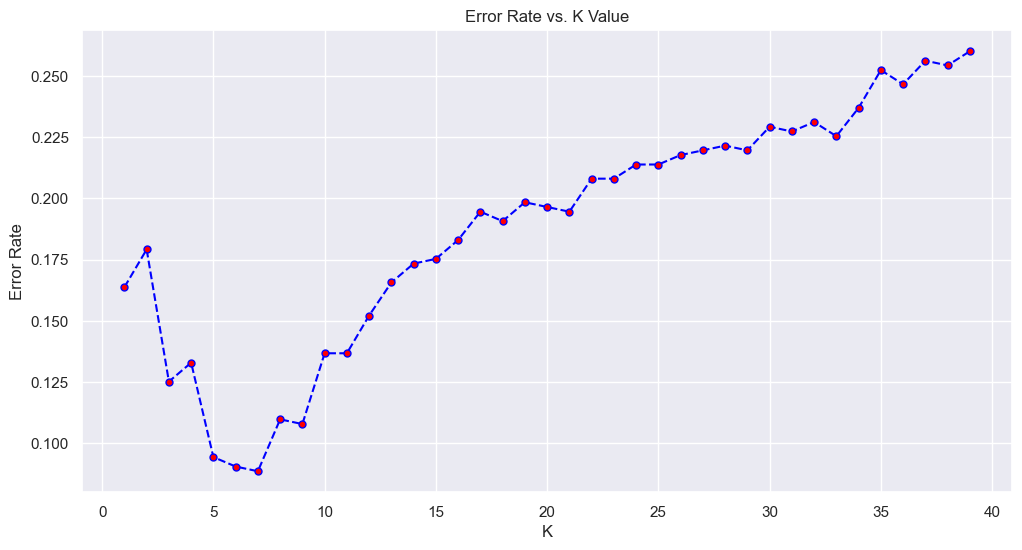

In [28]:
plt.figure(figsize=(12, 6))

plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=5)


plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [30]:
print('WITH K = 5')
print("\n")
print(confusion_matrix(y_test, knn_pred))
print("\n")
print(classification_report(y_test, knn_pred))

WITH K = 5


[[ 90   2  26   0]
 [  9   4   2   2]
 [  2   0 359   0]
 [  4   0   2  17]]


              precision    recall  f1-score   support

           0       0.86      0.76      0.81       118
           1       0.67      0.24      0.35        17
           2       0.92      0.99      0.96       361
           3       0.89      0.74      0.81        23

    accuracy                           0.91       519
   macro avg       0.84      0.68      0.73       519
weighted avg       0.90      0.91      0.90       519

